# Train Ensemble of Bagged Classification Trees

Load Fisher's Iris Dataset.

In [1]:
import pandas as pd
import numpy as np

# tmp = pd.read_csv('iris.csv', header=None).to_numpy()  # pandas does not work!
tmp = np.genfromtxt('iris.csv',delimiter=',')
K = tmp.shape[0]
X = tmp[:,0:4]
Y = tmp[:,4]
nc = [np.sum(Y == 1), np.sum(Y == 2), np.sum(Y == 3)]

Partition the data into Training and Testing (7:3 split)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, shuffle=None)

2. Train Several classifiers and obtain their output of the training datasets (bags). Bags are randomly 

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from numpy.random import permutation
nr = X_train.shape[0]
Kb = int(np.ceil(0.9*nr))

# (a) First use naive bayesian
bidx = permutation(nr)[0:Kb]
gnb = GaussianNB()
gnb.fit(X_train[bidx,:], y_train[bidx])
ynb = gnb.predict(X_train)
vnb = gnb.predict(X_test)
# (b) Next use knn k = 3
bidx1 = permutation(nr)[0:Kb]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[bidx1,:], y_train[bidx1])
yknn = knn.predict(X_train)
vknn = knn.predict(X_test)
# (C) Next use Decision Tree
bidx2 = permutation(nr)[0:Kb]
dtc = DecisionTreeClassifier(random_state=0)
dtc = dtc.fit(X_train[bidx2,:], y_train[bidx2])
ytree = dtc.predict(X_train)
vtree = dtc.predict(X_test)

3. Combine output of Ynb, Yknn, Ytree into a new feature matrix and train a classifier using Xc with label Yr. Then test. 


[1. 1. 2. 3. 1. 3. 2. 3. 3. 2. 2. 2. 3. 3. 1. 1. 3. 2. 1. 3. 3. 3. 2. 2.
 3. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1. 3. 1. 3. 3.]


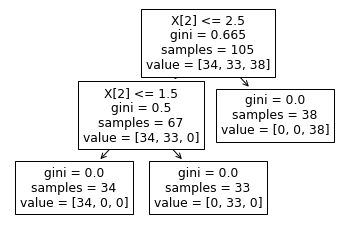

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dec = DecisionTreeClassifier()
dec.fit(np.mat([ynb,yknn,ytree]).T,y_train)
ycomb = dec.predict(np.mat([ynb,yknn,ytree]).T)
vcomb = dec.predict(np.mat([vnb,vknn,vtree]).T)
print(vcomb)

plot_tree(dec)
plt.show()


4. Compare results

In [5]:
 from sklearn.metrics import confusion_matrix

Cmatnb = confusion_matrix(y_test, vnb)
Cmatknn = confusion_matrix(y_test, vknn)
Cmattree = confusion_matrix(y_test, vtree)
Cmatcomb = confusion_matrix(y_test, vcomb)

print("Naive Bayes: ")
print(Cmatnb)
print("Knn: ")
print(Cmatknn)
print("Decision Tree: ")
print(Cmattree)
print("Combined: ")
print(Cmatcomb)

Naive Bayes: 
[[16  0  0]
 [ 0 16  1]
 [ 0  0 12]]
Knn: 
[[16  0  0]
 [ 0 16  1]
 [ 0  0 12]]
Decision Tree: 
[[16  0  0]
 [ 0 15  2]
 [ 0  0 12]]
Combined: 
[[16  0  0]
 [ 0 15  2]
 [ 0  0 12]]


Write CSV files

In [6]:
# Training data member classifiers' output and label
outr = np.mat([ynb, yknn, ytree, ycomb, y_train]).T
np.savetxt("outr.csv", outr, delimiter=",")
# Validation output, nb, knn, tree, combined.
outv = np.mat([vnb, vknn, vtree, vcomb, y_test]).T
np.savetxt("outv.csv", outv, delimiter=",")


In [7]:
print(iris.feature_names)

NameError: name 'iris' is not defined